# Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import PyQt5 as qt
import joblib

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler   #Method #1
from sklearn.preprocessing import scale            #Method #2

sns.set()

# Data Understanding

* Loyalty rated from 1 to 10 (Scaled)
* Satisfaction rated from 1 to 10 (Not Scaled)

# Data Preprocessing

In [2]:
data = pd.read_csv('loyalty_satisfaction.csv')
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


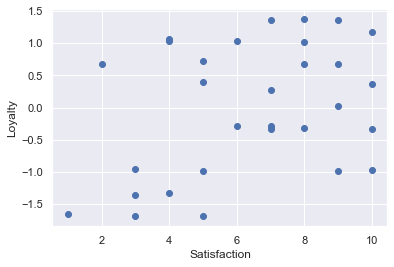

In [3]:
plt.clf()
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

In [4]:
data_scaled = scale(data.copy())
data_scaled[:5]

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534]])

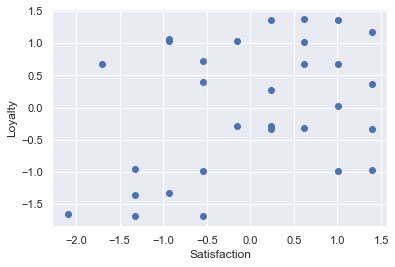

In [5]:
plt.clf()
plt.scatter(data_scaled[:,0],data_scaled[:,1])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

In [6]:
wcss = []

for iter in range(1,10):
    kmeans = KMeans(iter)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.792695153937186,
 6.54983679159933,
 5.34807941029098,
 4.520157866680131,
 3.8231980448085183]

In [7]:
for i,l in zip(wcss[1:], wcss):
    if i <= l*0.8:
        print(i)
        print(wcss.index(i)+1)
        print(True)

29.818973034723147
2
True
17.913349527387965
3
True
10.247181805928422
4
True
7.792695153937186
5
True


<AxesSubplot:>

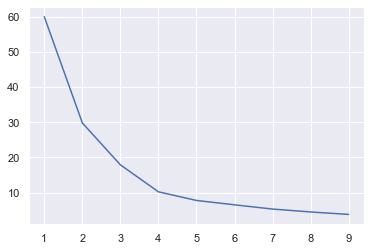

In [8]:
sns.lineplot(x=range(1,10),y=wcss)

# Modelling and Visualization

2 Clusters


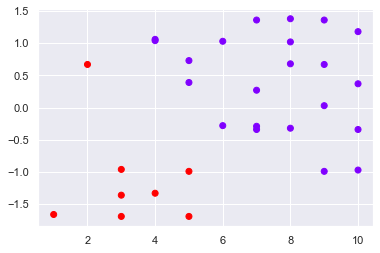

3 Clusters


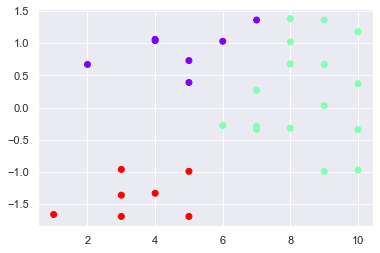

4 Clusters


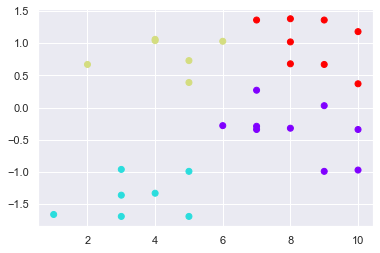

5 Clusters


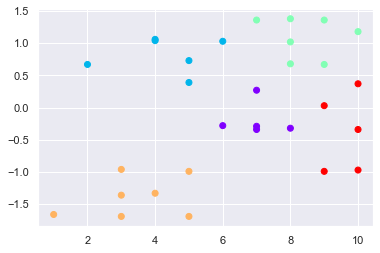

In [9]:
for clusters in range(2,6):
    kmeans = KMeans(clusters)
    kmeans.fit(data_scaled)
    data[str(clusters)+'_Clusters'] = kmeans.fit_predict(data_scaled)
    print ('{} Clusters'.format(clusters))
    plt.scatter(data['Satisfaction'], data['Loyalty'], c=data[str(clusters)+'_Clusters'], cmap='rainbow')
    plt.show()
    

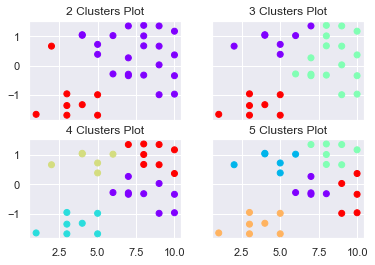

In [10]:
fig, ax = plt.subplots(2, 2, sharex='col', sharey='row')
ax[0][0].scatter(data['Satisfaction'], data['Loyalty'], c=data['2_Clusters'], cmap='rainbow')
ax[0][1].scatter(data['Satisfaction'], data['Loyalty'], c=data['3_Clusters'], cmap='rainbow')
ax[1][0].scatter(data['Satisfaction'], data['Loyalty'], c=data['4_Clusters'], cmap='rainbow')
ax[1][1].scatter(data['Satisfaction'], data['Loyalty'], c=data['5_Clusters'], cmap='rainbow')

ax[0][0].title.set_text('2 Clusters Plot')
ax[0][1].title.set_text('3 Clusters Plot')
ax[1][0].title.set_text('4 Clusters Plot')
ax[1][1].title.set_text('5 Clusters Plot')